In [1]:
#!/usr/bin/env python
from Diagnostic_functions import *


In [2]:
sigT = 400e-15
pulseRange = 20
nx = 100; ny = 100; nz = 40
range_x = 4e-3; range_y = 4e-3
factor = -1 # factor = 0.5
d_slit = 20e-3

tRange = 2
tRes = 2

fRange = 1
fRes = 1

def rCRL(fCRL, nCRL):
    # calculates the min radius of curvature of each lens
    return 7.58227e-06*fCRL/nCRL

fCRL0 = 290.; nCRL0 = 1
fCRL1 = 10.; nCRL1 = 1
fCRL2 = 10.; nCRL2 = 1


In [3]:
def set_optics_CC1(v=None):
    el = []
    pp = []
    names = ['CRL', 'CRL_C1', 'C1', 'C1_C2', 'C2']
    for el_name in names:
        if el_name == 'CRL':
            # CRL: crl 290.0m
            el.append(srwlib.srwl_opt_setup_CRL(
                _foc_plane=v.op_CRL_foc_plane,
                _delta=v.op_CRL_delta,
                _atten_len=v.op_CRL_atten_len,
                _shape=v.op_CRL_shape,
                _apert_h=v.op_CRL_apert_h,
                _apert_v=v.op_CRL_apert_v,
                _r_min=v.op_CRL_r_min,
                _n=v.op_CRL_n,
                _wall_thick=v.op_CRL_wall_thick,
                _xc=v.op_CRL_x,
                _yc=v.op_CRL_y,
            ))
            pp.append(v.op_CRL_pp)
        elif el_name == 'CRL_C1':
            # CRL_C1: drift 290.0m
            el.append(srwlib.SRWLOptD(
                _L=v.op_CRL_C1_L,
            ))
            pp.append(v.op_CRL_C1_pp)
        elif el_name == 'C1':
            # C1: crystal 300.0m
            crystal = srwlib.SRWLOptCryst(
                _d_sp=v.op_C1_d_sp,
                _psi0r=v.op_C1_psi0r,
                _psi0i=v.op_C1_psi0i,
                _psi_hr=v.op_C1_psiHr,
                _psi_hi=v.op_C1_psiHi,
                _psi_hbr=v.op_C1_psiHBr,
                _psi_hbi=v.op_C1_psiHBi,
                _tc=v.op_C1_tc,
                _ang_as=v.op_C1_ang_as,
                _nvx=v.op_C1_nvx,
                _nvy=v.op_C1_nvy,
                _nvz=v.op_C1_nvz,
                _tvx=v.op_C1_tvx,
                _tvy=v.op_C1_tvy,
                _uc=v.op_C1_uc,
                _e_avg=v.op_C1_energy,
                _ang_roll=v.op_C1_diffractionAngle
            )
            el.append(crystal)
            pp.append(v.op_C1_pp)

        elif el_name == 'C1_C2':
            # C1_C2: drift 300.0m
            el.append(srwlib.SRWLOptD(
                _L=v.op_C1_C2_L,
            ))
            pp.append(v.op_C1_C2_pp)
        elif el_name == 'C2':
            # C2: crystal 300.2m
            crystal = srwlib.SRWLOptCryst(
                _d_sp=v.op_C2_d_sp,
                _psi0r=v.op_C2_psi0r,
                _psi0i=v.op_C2_psi0i,
                _psi_hr=v.op_C2_psiHr,
                _psi_hi=v.op_C2_psiHi,
                _psi_hbr=v.op_C2_psiHBr,
                _psi_hbi=v.op_C2_psiHBi,
                _tc=v.op_C2_tc,
                _ang_as=v.op_C2_ang_as,
                _nvx=v.op_C2_nvx,
                _nvy=v.op_C2_nvy,
                _nvz=v.op_C2_nvz,
                _tvx=v.op_C2_tvx,
                _tvy=v.op_C2_tvy,
                _uc=v.op_C2_uc,
                _e_avg=v.op_C2_energy,
                _ang_roll=v.op_C2_diffractionAngle
            )
            el.append(crystal)
            pp.append(v.op_C2_pp)
    return srwlib.SRWLOptC(el, pp)


def set_optics_CC1_focus(v=None):
    el = []
    pp = []
    names = ['C2_CRL1', 'CRL1', 'CRL1_Slit', 'Slit']
    for el_name in names:
        if el_name == 'C2_CRL1':
            # C2_CRL1: drift 300.2m
            el.append(srwlib.SRWLOptD(
                _L=v.op_C2_CRL1_L,
            ))
            pp.append(v.op_C2_CRL1_pp)
        elif el_name == 'CRL1':
            # CRL1: crl 310.2m
            el.append(srwlib.srwl_opt_setup_CRL(
                _foc_plane=v.op_CRL1_foc_plane,
                _delta=v.op_CRL1_delta,
                _atten_len=v.op_CRL1_atten_len,
                _shape=v.op_CRL1_shape,
                _apert_h=v.op_CRL1_apert_h,
                _apert_v=v.op_CRL1_apert_v,
                _r_min=v.op_CRL1_r_min,
                _n=v.op_CRL1_n,
                _wall_thick=v.op_CRL1_wall_thick,
                _xc=v.op_CRL1_x,
                _yc=v.op_CRL1_y,
            ))
            pp.append(v.op_CRL1_pp)
        elif el_name == 'CRL1_Slit':
            # CRL1_Slit: drift 310.2m
            el.append(srwlib.SRWLOptD(
                _L=v.op_CRL1_Slit_L,
            ))
            pp.append(v.op_CRL1_Slit_pp)
        elif el_name == 'Slit':
            # Slit: aperture 320.2m
            el.append(srwlib.SRWLOptA(
                _shape=v.op_Slit_shape,
                _ap_or_ob='a',
                _Dx=v.op_Slit_Dx,
                _Dy=v.op_Slit_Dy,
                _x=v.op_Slit_x,
                _y=v.op_Slit_y,
            ))
            pp.append(v.op_Slit_pp)
    return srwlib.SRWLOptC(el, pp)


def set_optics_focus_CC2(v=None):
    el = []
    pp = []
    names = ['Slit_CRL2', 'CRL2', 'CRL2_C3']
    for el_name in names:
        if el_name == 'Slit_CRL2':
            # Slit_CRL2: drift 320.2m
            el.append(srwlib.SRWLOptD(
                _L=v.op_Slit_CRL2_L,
            ))
            pp.append(v.op_Slit_CRL2_pp)
        elif el_name == 'CRL2':
            # CRL2: crl 330.2m
            el.append(srwlib.srwl_opt_setup_CRL(
                _foc_plane=v.op_CRL2_foc_plane,
                _delta=v.op_CRL2_delta,
                _atten_len=v.op_CRL2_atten_len,
                _shape=v.op_CRL2_shape,
                _apert_h=v.op_CRL2_apert_h,
                _apert_v=v.op_CRL2_apert_v,
                _r_min=v.op_CRL2_r_min,
                _n=v.op_CRL2_n,
                _wall_thick=v.op_CRL2_wall_thick,
                _xc=v.op_CRL2_x,
                _yc=v.op_CRL2_y,
            ))
            pp.append(v.op_CRL2_pp)
        elif el_name == 'CRL2_C3':
            # CRL2_C3: drift 330.2m
            el.append(srwlib.SRWLOptD(
                _L=v.op_CRL2_C3_L,
            ))
            pp.append(v.op_CRL2_C3_pp)
    return srwlib.SRWLOptC(el, pp)


def set_optics_CC2(v=None):
    el = []
    pp = []
    names = ['C3', 'C3_C4', 'C4', 'C4_After_HRM', 'After_HRM']
    for el_name in names:
        if el_name == 'C3':
            # C3: crystal 340.2m
            crystal = srwlib.SRWLOptCryst(
                _d_sp=v.op_C3_d_sp,
                _psi0r=v.op_C3_psi0r,
                _psi0i=v.op_C3_psi0i,
                _psi_hr=v.op_C3_psiHr,
                _psi_hi=v.op_C3_psiHi,
                _psi_hbr=v.op_C3_psiHBr,
                _psi_hbi=v.op_C3_psiHBi,
                _tc=v.op_C3_tc,
                _ang_as=v.op_C3_ang_as,
                _nvx=v.op_C3_nvx,
                _nvy=v.op_C3_nvy,
                _nvz=v.op_C3_nvz,
                _tvx=v.op_C3_tvx,
                _tvy=v.op_C3_tvy,
                _uc=v.op_C3_uc,
                _e_avg=v.op_C3_energy,
                _ang_roll=v.op_C3_diffractionAngle
            )
            el.append(crystal)
            pp.append(v.op_C3_pp)

        elif el_name == 'C3_C4':
            # C3_C4: drift 340.2m
            el.append(srwlib.SRWLOptD(
                _L=v.op_C3_C4_L,
            ))
            pp.append(v.op_C3_C4_pp)
        elif el_name == 'C4':
            # C4: crystal 340.4m
            crystal = srwlib.SRWLOptCryst(
                _d_sp=v.op_C4_d_sp,
                _psi0r=v.op_C4_psi0r,
                _psi0i=v.op_C4_psi0i,
                _psi_hr=v.op_C4_psiHr,
                _psi_hi=v.op_C4_psiHi,
                _psi_hbr=v.op_C4_psiHBr,
                _psi_hbi=v.op_C4_psiHBi,
                _tc=v.op_C4_tc,
                _ang_as=v.op_C4_ang_as,
                _nvx=v.op_C4_nvx,
                _nvy=v.op_C4_nvy,
                _nvz=v.op_C4_nvz,
                _tvx=v.op_C4_tvx,
                _tvy=v.op_C4_tvy,
                _uc=v.op_C4_uc,
                _e_avg=v.op_C4_energy,
                _ang_roll=v.op_C4_diffractionAngle
            )
            el.append(crystal)
            pp.append(v.op_C4_pp)

        elif el_name == 'C4_After_HRM':
            # C4_After_HRM: drift 340.4m
            el.append(srwlib.SRWLOptD(
                _L=v.op_C4_After_HRM_L,
            ))
            pp.append(v.op_C4_After_HRM_pp)
        elif el_name == 'After_HRM':
            # After_HRM: watch 350.4m
            pass
    pp.append(v.op_fin_pp)
    return srwlib.SRWLOptC(el, pp)


In [4]:
varParam = srwl_bl.srwl_uti_ext_options([
    ['name', 's', 'mono_only', 'simulation name'],

#---Data Folder
    ['fdir', 's', '', 'folder (directory) name for reading-in input and saving output data files'],


    ['gbm_x', 'f', 0.0, 'average horizontal coordinates of waist [m]'],
    ['gbm_y', 'f', 0.0, 'average vertical coordinates of waist [m]'],
    ['gbm_z', 'f', 0.0, 'average longitudinal coordinate of waist [m]'],
    ['gbm_xp', 'f', 0.0, 'average horizontal angle at waist [rad]'],
    ['gbm_yp', 'f', 0.0, 'average verical angle at waist [rad]'],
    ['gbm_ave', 'f', 9481.0, 'average photon energy [eV]'],
    ['gbm_pen', 'f', 0.001, 'energy per pulse [J]'],
    ['gbm_rep', 'f', 1, 'rep. rate [Hz]'],
    ['gbm_pol', 'f', 2, 'polarization 1- lin. hor., 2- lin. vert., 3- lin. 45 deg., 4- lin.135 deg., 5- circ. right, 6- circ. left'],
    ['gbm_sx', 'f', 9.787234042553194e-06, 'rms beam size vs horizontal position [m] at waist (for intensity)'],
    ['gbm_sy', 'f', 9.787234042553194e-06, 'rms beam size vs vertical position [m] at waist (for intensity)'],
    ['gbm_st', 'f', sigT, 'rms pulse duration [s] (for intensity)'],
    ['gbm_mx', 'f', 0, 'transverse Gauss-Hermite mode order in horizontal direction'],
    ['gbm_my', 'f', 0, 'transverse Gauss-Hermite mode order in vertical direction'],
    ['gbm_ca', 's', 'c', 'treat _sigX, _sigY as sizes in [m] in coordinate representation (_presCA="c") or as angular divergences in [rad] in angular representation (_presCA="a")'],
    ['gbm_ft', 's', 't', 'treat _sigT as pulse duration in [s] in time domain/representation (_presFT="t") or as bandwidth in [eV] in frequency domain/representation (_presFT="f")'],

#---Calculation Types
    #Single-Electron Intensity distribution vs horizontal and vertical position
    ['si', '', '', 'calculate single-e intensity distribution (without wavefront propagation through a beamline) vs horizontal and vertical position', 'store_true'],
    #Single-Electron Wavefront Propagation
    ['ws', '', '', 'calculate single-electron (/ fully coherent) wavefront propagation', 'store_true'],
    #Multi-Electron (partially-coherent) Wavefront Propagation
    ['wm', '', '', 'calculate multi-electron (/ partially coherent) wavefront propagation', 'store_true'],

    ['w_e', 'f', -pulseRange*sigT/2, 'photon energy [eV] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ef', 'f', pulseRange*sigT/2, 'final photon energy [eV] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ne', 'i', nz, 'number of points vs photon energy for calculation of intensity distribution'],
    ['w_x', 'f', 0.0, 'central horizontal position [m] for calculation of intensity distribution'],
    ['w_rx', 'f', range_x, 'range of horizontal position [m] for calculation of intensity distribution'],
    ['w_nx', 'i', nx, 'number of points vs horizontal position for calculation of intensity distribution'],
    ['w_y', 'f', 0.0, 'central vertical position [m] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ry', 'f', range_y, 'range of vertical position [m] for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_ny', 'i', ny, 'number of points vs vertical position for calculation of intensity distribution'],
    ['w_smpf', 'f', factor, 'sampling factor for calculation of intensity distribution vs horizontal and vertical position'],
    ['w_meth', 'i', 2, 'method to use for calculation of intensity distribution vs horizontal and vertical position: 0- "manual", 1- "auto-undulator", 2- "auto-wiggler"'],
    ['w_prec', 'f', 0.01, 'relative precision for calculation of intensity distribution vs horizontal and vertical position'],

    ['w_ft', 's', 't', 'presentation/domain: "f"- frequency (photon energy), "t"- time'],

    ['w_u', 'i', 2, 'electric field units: 0- arbitrary, 1- sqrt(Phot/s/0.1%bw/mm^2), 2- sqrt(J/eV/mm^2) or sqrt(W/mm^2), depending on representation (freq. or time)'],
    ['si_pol', 'i', 6, 'polarization component to extract after calculation of intensity distribution: 0- Linear Horizontal, 1- Linear Vertical, 2- Linear 45 degrees, 3- Linear 135 degrees, 4- Circular Right, 5- Circular Left, 6- Total'],
    ['si_type', 'i', 0, 'type of a characteristic to be extracted after calculation of intensity distribution: 0- Single-Electron Intensity, 1- Multi-Electron Intensity, 2- Single-Electron Flux, 3- Multi-Electron Flux, 4- Single-Electron Radiation Phase, 5- Re(E): Real part of Single-Electron Electric Field, 6- Im(E): Imaginary part of Single-Electron Electric Field, 7- Single-Electron Intensity, integrated over Time or Photon Energy'],
    
    ['si_fn', 's', 'res_int_se.dat', 'file name for saving calculated single-e intensity distribution (without wavefront propagation through a beamline) vs horizontal and vertical position'],
    ['si_pl', 's', '', 'plot the input intensity distributions in graph(s): ""- dont plot, "x"- vs horizontal position, "y"- vs vertical position, "xy"- vs horizontal and vertical position'],
    ['ws_fni', 's', 'res_int_pr_se.dat', 'file name for saving propagated single-e intensity distribution vs horizontal and vertical position'],
    ['ws_pl', 's', '', 'plot the resulting intensity distributions in graph(s): ""- dont plot, "x"- vs horizontal position, "y"- vs vertical position, "xy"- vs horizontal and vertical position'],

    #to add options
    ['op_r', 'f', 290.0, 'longitudinal position of the first optical element [m]'],
    # Former appParam:
    ['rs_type', 's', 'g', 'source type, (u) idealized undulator, (t), tabulated undulator, (m) multipole, (g) gaussian beam'],

    # # Electron Trajectory
    # ['tr', '', '', 'calculate electron trajectory', 'store_true'],
    # ['tr_cti', 'f', 0.0, 'initial time moment (c*t) for electron trajectory calculation [m]'],
    # ['tr_ctf', 'f', 0.0, 'final time moment (c*t) for electron trajectory calculation [m]'],
    # ['tr_np', 'f', 10000, 'number of points for trajectory calculation'],
    # ['tr_mag', 'i', 1, 'magnetic field to be used for trajectory calculation: 1- approximate, 2- accurate'],
    # ['tr_fn', 's', 'res_trj.dat', 'file name for saving calculated trajectory data'],
    # ['tr_pl', 's', '', 'plot the resulting trajectiry in graph(s): ""- dont plot, otherwise the string should list the trajectory components to plot'],

    # #Single-Electron Spectrum vs Photon Energy
    # ['ss', '', '', 'calculate single-e spectrum vs photon energy', 'store_true'],
    # ['ss_ei', 'f', 100.0, 'initial photon energy [eV] for single-e spectrum vs photon energy calculation'],
    # ['ss_ef', 'f', 20000.0, 'final photon energy [eV] for single-e spectrum vs photon energy calculation'],
    # ['ss_ne', 'i', 10000, 'number of points vs photon energy for single-e spectrum vs photon energy calculation'],
    # ['ss_x', 'f', 0.0, 'horizontal position [m] for single-e spectrum vs photon energy calculation'],
    # ['ss_y', 'f', 0.0, 'vertical position [m] for single-e spectrum vs photon energy calculation'],
    # ['ss_meth', 'i', 1, 'method to use for single-e spectrum vs photon energy calculation: 0- "manual", 1- "auto-undulator", 2- "auto-wiggler"'],
    # ['ss_prec', 'f', 0.01, 'relative precision for single-e spectrum vs photon energy calculation (nominal value is 0.01)'],
    # ['ss_pol', 'i', 6, 'polarization component to extract after spectrum vs photon energy calculation: 0- Linear Horizontal, 1- Linear Vertical, 2- Linear 45 degrees, 3- Linear 135 degrees, 4- Circular Right, 5- Circular Left, 6- Total'],
    # ['ss_mag', 'i', 1, 'magnetic field to be used for single-e spectrum vs photon energy calculation: 1- approximate, 2- accurate'],
    # ['ss_ft', 's', 'f', 'presentation/domain: "f"- frequency (photon energy), "t"- time'],
    # ['ss_u', 'i', 1, 'electric field units: 0- arbitrary, 1- sqrt(Phot/s/0.1%bw/mm^2), 2- sqrt(J/eV/mm^2) or sqrt(W/mm^2), depending on representation (freq. or time)'],
    # ['ss_fn', 's', 'res_spec_se.dat', 'file name for saving calculated single-e spectrum vs photon energy'],
    # ['ss_pl', 's', '', 'plot the resulting single-e spectrum in a graph: ""- dont plot, "e"- show plot vs photon energy'],

    # #Multi-Electron Spectrum vs Photon Energy (taking into account e-beam emittance, energy spread and collection aperture size)
    # ['sm', '', '', 'calculate multi-e spectrum vs photon energy', 'store_true'],
    # ['sm_ei', 'f', 100.0, 'initial photon energy [eV] for multi-e spectrum vs photon energy calculation'],
    # ['sm_ef', 'f', 20000.0, 'final photon energy [eV] for multi-e spectrum vs photon energy calculation'],
    # ['sm_ne', 'i', 10000, 'number of points vs photon energy for multi-e spectrum vs photon energy calculation'],
    # ['sm_x', 'f', 0.0, 'horizontal center position [m] for multi-e spectrum vs photon energy calculation'],
    # ['sm_rx', 'f', 0.001, 'range of horizontal position / horizontal aperture size [m] for multi-e spectrum vs photon energy calculation'],
    # ['sm_nx', 'i', 1, 'number of points vs horizontal position for multi-e spectrum vs photon energy calculation'],
    # ['sm_y', 'f', 0.0, 'vertical center position [m] for multi-e spectrum vs photon energy calculation'],
    # ['sm_ry', 'f', 0.001, 'range of vertical position / vertical aperture size [m] for multi-e spectrum vs photon energy calculation'],
    # ['sm_ny', 'i', 1, 'number of points vs vertical position for multi-e spectrum vs photon energy calculation'],
    # ['sm_mag', 'i', 1, 'magnetic field to be used for calculation of multi-e spectrum spectrum or intensity distribution: 1- approximate, 2- accurate'],
    # ['sm_hi', 'i', 1, 'initial UR spectral harmonic to be taken into account for multi-e spectrum vs photon energy calculation'],
    # ['sm_hf', 'i', 15, 'final UR spectral harmonic to be taken into account for multi-e spectrum vs photon energy calculation'],
    # ['sm_prl', 'f', 1.0, 'longitudinal integration precision parameter for multi-e spectrum vs photon energy calculation'],
    # ['sm_pra', 'f', 1.0, 'azimuthal integration precision parameter for multi-e spectrum vs photon energy calculation'],
    # ['sm_meth', 'i', -1, 'method to use for spectrum vs photon energy calculation in case of arbitrary input magnetic field: 0- "manual", 1- "auto-undulator", 2- "auto-wiggler", -1- dont use this accurate integration method (rather use approximate if possible)'],
    # ['sm_prec', 'f', 0.01, 'relative precision for spectrum vs photon energy calculation in case of arbitrary input magnetic field (nominal value is 0.01)'],
    # ['sm_nm', 'i', 1, 'number of macro-electrons for calculation of spectrum in case of arbitrary input magnetic field'],
    # ['sm_na', 'i', 5, 'number of macro-electrons to average on each node at parallel (MPI-based) calculation of spectrum in case of arbitrary input magnetic field'],
    # ['sm_ns', 'i', 5, 'saving periodicity (in terms of macro-electrons) for intermediate intensity at calculation of multi-electron spectrum in case of arbitrary input magnetic field'],
    # ['sm_type', 'i', 1, 'calculate flux (=1) or flux per unit surface (=2)'],
    # ['sm_pol', 'i', 6, 'polarization component to extract after calculation of multi-e flux or intensity: 0- Linear Horizontal, 1- Linear Vertical, 2- Linear 45 degrees, 3- Linear 135 degrees, 4- Circular Right, 5- Circular Left, 6- Total'],
    # ['sm_rm', 'i', 1, 'method for generation of pseudo-random numbers for e-beam phase-space integration: 1- standard pseudo-random number generator, 2- Halton sequences, 3- LPtau sequences (to be implemented)'],
    # ['sm_fn', 's', 'res_spec_me.dat', 'file name for saving calculated milti-e spectrum vs photon energy'],
    # ['sm_pl', 's', '', 'plot the resulting spectrum-e spectrum in a graph: ""- dont plot, "e"- show plot vs photon energy'],
    # #to add options for the multi-e calculation from "accurate" magnetic field

    # #Power Density Distribution vs horizontal and vertical position
    # ['pw', '', '', 'calculate SR power density distribution', 'store_true'],
    # ['pw_x', 'f', 0.0, 'central horizontal position [m] for calculation of power density distribution vs horizontal and vertical position'],
    # ['pw_rx', 'f', 0.015, 'range of horizontal position [m] for calculation of power density distribution vs horizontal and vertical position'],
    # ['pw_nx', 'i', 100, 'number of points vs horizontal position for calculation of power density distribution'],
    # ['pw_y', 'f', 0.0, 'central vertical position [m] for calculation of power density distribution vs horizontal and vertical position'],
    # ['pw_ry', 'f', 0.015, 'range of vertical position [m] for calculation of power density distribution vs horizontal and vertical position'],
    # ['pw_ny', 'i', 100, 'number of points vs vertical position for calculation of power density distribution'],
    # ['pw_pr', 'f', 1.0, 'precision factor for calculation of power density distribution'],
    # ['pw_meth', 'i', 1, 'power density computation method (1- "near field", 2- "far field")'],
    # ['pw_zst', 'f', 0., 'initial longitudinal position along electron trajectory of power density distribution (effective if pow_sst < pow_sfi)'],
    # ['pw_zfi', 'f', 0., 'final longitudinal position along electron trajectory of power density distribution (effective if pow_sst < pow_sfi)'],
    # ['pw_mag', 'i', 1, 'magnetic field to be used for power density calculation: 1- approximate, 2- accurate'],
    # ['pw_fn', 's', 'res_pow.dat', 'file name for saving calculated power density distribution'],
    # ['pw_pl', 's', '', 'plot the resulting power density distribution in a graph: ""- dont plot, "x"- vs horizontal position, "y"- vs vertical position, "xy"- vs horizontal and vertical position'],


    
    # ['w_mag', 'i', 1, 'magnetic field to be used for calculation of intensity distribution vs horizontal and vertical position: 1- approximate, 2- accurate'],


    # ['wm_nm', 'i', 1000, 'number of macro-electrons (coherent wavefronts) for calculation of multi-electron wavefront propagation'],
    # ['wm_na', 'i', 5, 'number of macro-electrons (coherent wavefronts) to average on each node for parallel (MPI-based) calculation of multi-electron wavefront propagation'],
    # ['wm_ns', 'i', 5, 'saving periodicity (in terms of macro-electrons / coherent wavefronts) for intermediate intensity at multi-electron wavefront propagation calculation'],
    # ['wm_ch', 'i', 0, 'type of a characteristic to be extracted after calculation of multi-electron wavefront propagation: #0- intensity (s0); 1- four Stokes components; 2- mutual intensity cut vs x; 3- mutual intensity cut vs y; 40- intensity(s0), mutual intensity cuts and degree of coherence vs X & Y'],
    # ['wm_ap', 'i', 0, 'switch specifying representation of the resulting Stokes parameters: coordinate (0) or angular (1)'],
    # ['wm_x0', 'f', 0.0, 'horizontal center position for mutual intensity cut calculation'],
    # ['wm_y0', 'f', 0.0, 'vertical center position for mutual intensity cut calculation'],
    # ['wm_ei', 'i', 0, 'integration over photon energy is required (1) or not (0); if the integration is required, the limits are taken from w_e, w_ef'],
    # ['wm_rm', 'i', 1, 'method for generation of pseudo-random numbers for e-beam phase-space integration: 1- standard pseudo-random number generator, 2- Halton sequences, 3- LPtau sequences (to be implemented)'],
    # ['wm_am', 'i', 0, 'multi-electron integration approximation method: 0- no approximation (use the standard 5D integration method), 1- integrate numerically only over e-beam energy spread and use convolution to treat transverse emittance'],
    # ['wm_fni', 's', 'res_int_pr_me.dat', 'file name for saving propagated multi-e intensity distribution vs horizontal and vertical position'],
    # ['wm_fbk', '', '', 'create backup file(s) with propagated multi-e intensity distribution vs horizontal and vertical position and other radiation characteristics', 'store_true'],

    
#---Beamline optics:
    # CRL: crl
    ['op_CRL_foc_plane', 'f', 2, 'focalPlane'],
    ['op_CRL_delta', 'f', 3.791135e-06, 'refractiveIndex'],
    ['op_CRL_atten_len', 'f', 0.008387, 'attenuationLength'],
    ['op_CRL_shape', 'f', 1, 'shape'],
    ['op_CRL_apert_h', 'f', 0.001, 'horizontalApertureSize'],
    ['op_CRL_apert_v', 'f', 0.001, 'verticalApertureSize'],
    ['op_CRL_r_min', 'f', rCRL(fCRL0, nCRL0), 'tipRadius'],
    ['op_CRL_wall_thick', 'f', 5e-05, 'tipWallThickness'],
    ['op_CRL_x', 'f', 0.0, 'horizontalOffset'],
    ['op_CRL_y', 'f', 0.0, 'verticalOffset'],
    ['op_CRL_n', 'i', 1, 'numberOfLenses'],

    # CRL_C1: drift
    ['op_CRL_C1_L', 'f', 10.0, 'length'],

    # C1: crystal
    ['op_C1_hfn', 's', '', 'heightProfileFile'],
    ['op_C1_dim', 's', 'x', 'orientation'],
    ['op_C1_d_sp', 'f', 0.9600687344008111, 'dSpacing'],
    ['op_C1_psi0r', 'f', -1.0873035035585694e-05, 'psi0r'],
    ['op_C1_psi0i', 'f', 1.8438837339536554e-07, 'psi0i'],
    ['op_C1_psiHr', 'f', -4.181686438547451e-06, 'psiHr'],
    ['op_C1_psiHi', 'f', 1.6100412693351052e-07, 'psiHi'],
    ['op_C1_psiHBr', 'f', -4.181686438547451e-06, 'psiHBr'],
    ['op_C1_psiHBi', 'f', 1.6100412693351052e-07, 'psiHBi'],
    ['op_C1_tc', 'f', 0.01, 'crystalThickness'],
    ['op_C1_uc', 'f', 1, 'useCase'],
    ['op_C1_ang_as', 'f', 0.0, 'asymmetryAngle'],
    ['op_C1_nvx', 'f', -0.7322282430733594, 'nvx'],
    ['op_C1_nvy', 'f', 4.975415277322606e-09, 'nvy'],
    ['op_C1_nvz', 'f', -0.6810593219725439, 'nvz'],
    ['op_C1_tvx', 'f', -0.6810593219725439, 'tvx'],
    ['op_C1_tvy', 'f', 4.627727743855522e-09, 'tvy'],
    ['op_C1_ang', 'f', 0.7492083731847909, 'grazingAngle'],
    ['op_C1_amp_coef', 'f', 1.0, 'heightAmplification'],
    ['op_C1_energy', 'f', 9481.0, 'energy'],
    ['op_C1_diffractionAngle', 'f', 1.57079632, 'diffractionAngle'],

    # C1_C2: drift
    ['op_C1_C2_L', 'f', 0.19999999999998863, 'length'],

    # C2: crystal
    ['op_C2_hfn', 's', '', 'heightProfileFile'],
    ['op_C2_dim', 's', 'x', 'orientation'],
    ['op_C2_d_sp', 'f', 0.9600687344008111, 'dSpacing'],
    ['op_C2_psi0r', 'f', -1.0873035035585694e-05, 'psi0r'],
    ['op_C2_psi0i', 'f', 1.8438837339536554e-07, 'psi0i'],
    ['op_C2_psiHr', 'f', -4.181686438547451e-06, 'psiHr'],
    ['op_C2_psiHi', 'f', 1.6100412693351052e-07, 'psiHi'],
    ['op_C2_psiHBr', 'f', -4.181686438547451e-06, 'psiHBr'],
    ['op_C2_psiHBi', 'f', 1.6100412693351052e-07, 'psiHBi'],
    ['op_C2_tc', 'f', 0.01, 'crystalThickness'],
    ['op_C2_uc', 'f', 1, 'useCase'],
    ['op_C2_ang_as', 'f', -0.6619756915046209, 'asymmetryAngle'],
    ['op_C2_nvx', 'f', 0.1589403166091094, 'nvx'],
    ['op_C2_nvy', 'f', 1.079983033869711e-09, 'nvy'],
    ['op_C2_nvz', 'f', -0.9872881928576863, 'nvz'],
    ['op_C2_tvx', 'f', 0.9872881928576863, 'tvx'],
    ['op_C2_tvy', 'f', 6.708521290092094e-09, 'tvy'],
    ['op_C2_ang', 'f', 1.4111790941168765, 'grazingAngle'],
    ['op_C2_amp_coef', 'f', 1.0, 'heightAmplification'],
    ['op_C2_energy', 'f', 9481.0, 'energy'],
    ['op_C2_diffractionAngle', 'f', -1.57079632, 'diffractionAngle'],

    # C2_CRL1: drift
    ['op_C2_CRL1_L', 'f', 10.0, 'length'],

    # CRL1: crl
    ['op_CRL1_foc_plane', 'f', 1, 'focalPlane'],
    ['op_CRL1_delta', 'f', 3.791135e-06, 'refractiveIndex'],
    ['op_CRL1_atten_len', 'f', 0.008387, 'attenuationLength'],
    ['op_CRL1_shape', 'f', 1, 'shape'],
    ['op_CRL1_apert_h', 'f', 0.0015, 'horizontalApertureSize'],
    ['op_CRL1_apert_v', 'f', 0.0015, 'verticalApertureSize'],
    ['op_CRL1_r_min', 'f', rCRL(fCRL1, nCRL1), 'tipRadius'],
    ['op_CRL1_wall_thick', 'f', 5e-05, 'tipWallThickness'],
    ['op_CRL1_x', 'f', 0.0, 'horizontalOffset'],
    ['op_CRL1_y', 'f', 0.0, 'verticalOffset'],
    ['op_CRL1_n', 'i', 1, 'numberOfLenses'],

    # CRL1_Slit: drift
    ['op_CRL1_Slit_L', 'f', 10.0, 'length'],

    # Slit: aperture
    ['op_Slit_shape', 's', 'r', 'shape'],
    ['op_Slit_Dx', 'f', d_slit, 'horizontalSize'],
    ['op_Slit_Dy', 'f', 0.01, 'verticalSize'],
    ['op_Slit_x', 'f', 0.0, 'horizontalOffset'],
    ['op_Slit_y', 'f', 0.0, 'verticalOffset'],

    # Slit_CRL2: drift
    ['op_Slit_CRL2_L', 'f', 10.0, 'length'],

    # CRL2: crl
    ['op_CRL2_foc_plane', 'f', 1, 'focalPlane'],
    ['op_CRL2_delta', 'f', 3.791135e-06, 'refractiveIndex'],
    ['op_CRL2_atten_len', 'f', 0.008387, 'attenuationLength'],
    ['op_CRL2_shape', 'f', 1, 'shape'],
    ['op_CRL2_apert_h', 'f', 0.0015, 'horizontalApertureSize'],
    ['op_CRL2_apert_v', 'f', 0.0015, 'verticalApertureSize'],
    ['op_CRL2_r_min', 'f', rCRL(fCRL2, nCRL2), 'tipRadius'],
    ['op_CRL2_wall_thick', 'f', 5e-05, 'tipWallThickness'],
    ['op_CRL2_x', 'f', 0.0, 'horizontalOffset'],
    ['op_CRL2_y', 'f', 0.0, 'verticalOffset'],
    ['op_CRL2_n', 'i', 1, 'numberOfLenses'],

    # CRL2_C3: drift
    ['op_CRL2_C3_L', 'f', 10.0, 'length'],

    # C3: crystal
    ['op_C3_hfn', 's', '', 'heightProfileFile'],
    ['op_C3_dim', 's', 'x', 'orientation'],
    ['op_C3_d_sp', 'f', 0.9600687344008111, 'dSpacing'],
    ['op_C3_psi0r', 'f', -1.0873035035585694e-05, 'psi0r'],
    ['op_C3_psi0i', 'f', 1.8438837339536554e-07, 'psi0i'],
    ['op_C3_psiHr', 'f', -4.181686438547451e-06, 'psiHr'],
    ['op_C3_psiHi', 'f', 1.6100412693351052e-07, 'psiHi'],
    ['op_C3_psiHBr', 'f', -4.181686438547451e-06, 'psiHBr'],
    ['op_C3_psiHBi', 'f', 1.6100412693351052e-07, 'psiHBi'],
    ['op_C3_tc', 'f', 0.01, 'crystalThickness'],
    ['op_C3_uc', 'f', 1, 'useCase'],
    ['op_C3_ang_as', 'f', 0.0, 'asymmetryAngle'],
    ['op_C3_nvx', 'f', 0.7322282430733594, 'nvx'],
    ['op_C3_nvy', 'f', 4.975415277322606e-09, 'nvy'],
    ['op_C3_nvz', 'f', -0.6810593219725439, 'nvz'],
    ['op_C3_tvx', 'f', 0.6810593219725439, 'tvx'],
    ['op_C3_tvy', 'f', 4.627727743855522e-09, 'tvy'],
    ['op_C3_ang', 'f', 0.7492083731847909, 'grazingAngle'],
    ['op_C3_amp_coef', 'f', 1.0, 'heightAmplification'],
    ['op_C3_energy', 'f', 9481.0, 'energy'],
    ['op_C3_diffractionAngle', 'f', -1.57079632, 'diffractionAngle'],

    # C3_C4: drift
    ['op_C3_C4_L', 'f', 0.19999999999998863, 'length'],

    # C4: crystal
    ['op_C4_hfn', 's', '', 'heightProfileFile'],
    ['op_C4_dim', 's', 'x', 'orientation'],
    ['op_C4_d_sp', 'f', 0.9600687344008111, 'dSpacing'],
    ['op_C4_psi0r', 'f', -1.0873035035585694e-05, 'psi0r'],
    ['op_C4_psi0i', 'f', 1.8438837339536554e-07, 'psi0i'],
    ['op_C4_psiHr', 'f', -4.181686438547451e-06, 'psiHr'],
    ['op_C4_psiHi', 'f', 1.6100412693351052e-07, 'psiHi'],
    ['op_C4_psiHBr', 'f', -4.181686438547451e-06, 'psiHBr'],
    ['op_C4_psiHBi', 'f', 1.6100412693351052e-07, 'psiHBi'],
    ['op_C4_tc', 'f', 0.01, 'crystalThickness'],
    ['op_C4_uc', 'f', 1, 'useCase'],
    ['op_C4_ang_as', 'f', 0.6619756915046209, 'asymmetryAngle'],
    ['op_C4_nvx', 'f', -0.9961927321489331, 'nvx'],
    ['op_C4_nvy', 'f', 6.769026714795782e-09, 'nvy'],
    ['op_C4_nvz', 'f', -0.08717821065864992, 'nvz'],
    ['op_C4_tvx', 'f', -0.08717821065864992, 'tvx'],
    ['op_C4_tvy', 'f', 5.923669364898284e-10, 'tvy'],
    ['op_C4_ang', 'f', 0.08728901635673195, 'grazingAngle'],
    ['op_C4_amp_coef', 'f', 1.0, 'heightAmplification'],
    ['op_C4_energy', 'f', 9481.0, 'energy'],
    ['op_C4_diffractionAngle', 'f', 1.57079632, 'diffractionAngle'],

    # C4_After_HRM: drift
    ['op_C4_After_HRM_L', 'f', 10.0, 'length'],

#---Propagation parameters
#                               [0][1] [2] [3][4] [5]  [6]  [7]  [8]  [9] [10] [11]
    ['op_CRL_pp', 'f',          [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'CRL'],
    ['op_CRL_C1_pp', 'f',       [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'CRL_C1'],
    ['op_C1_pp', 'f',           [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, -0.997381741513, 6.777e-09, 0.072316399909, 0.072316399909, 6.304e-09], 'C1'],
    ['op_C1_C2_pp', 'f',        [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'C1_C2'],
    ['op_C2_pp', 'f',           [0, 0, 1.0, 0, 0, 5.0, 4.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.997382667547, 6.777e-09, 0.072303626994, 0.072303626994, -6.304e-09], 'C2'],
    # higher resolution after C2, less range (<10), or not resizing range at all since axis shrinks automatically
    ['op_C2_CRL1_pp', 'f',      [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'C2_CRL1'],
    ['op_CRL1_pp', 'f',         [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'CRL1'],
    ['op_CRL1_Slit_pp', 'f',    [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'CRL1_Slit'],
    ['op_Slit_pp', 'f',         [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Slit'],
    ['op_Slit_CRL2_pp', 'f',    [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Slit_CRL2'],
    ['op_CRL2_pp', 'f',         [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'CRL2'],
    ['op_CRL2_C3_pp', 'f',      [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'CRL2_C3'],
    ['op_C3_pp', 'f',           [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.99738266769, 6.777e-09, 0.072303625018, 0.072303625018, -6.304e-09], 'C3'],
    ['op_C3_C4_pp', 'f',        [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'C3_C4'],
    ['op_C4_pp', 'f',           [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, -0.997381741513, 6.777e-09, 0.072316399909, 0.072316399909, 6.304e-09], 'C4'],
    ['op_C4_After_HRM_pp', 'f', [0, 0, 1.0, 1, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'C4_After_HRM'],
    ['op_fin_pp', 'f',          [0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'final post-propagation (resize) parameters'],

    #[ 0]: Auto-Resize (1) or not (0) Before propagation
    #[ 1]: Auto-Resize (1) or not (0) After propagation
    #[ 2]: Relative Precision for propagation with Auto-Resizing (1. is nominal)
    #[ 3]: Allow (1) or not (0) for semi-analytical treatment of the quadratic (leading) phase terms at the propagation
    #[ 4]: Do any Resizing on Fourier side, using FFT, (1) or not (0)
    #[ 5]: Horizontal Range modification factor at Resizing (1. means no modification)
    #[ 6]: Horizontal Resolution modification factor at Resizing
    #[ 7]: Vertical Range modification factor at Resizing
    #[ 8]: Vertical Resolution modification factor at Resizing
    #[ 9]: Type of wavefront Shift before Resizing (not yet implemented)
    #[10]: New Horizontal wavefront Center position after Shift (not yet implemented)
    #[11]: New Vertical wavefront Center position after Shift (not yet implemented)
    #[12]: Optional: Orientation of the Output Optical Axis vector in the Incident Beam Frame: Horizontal Coordinate
    #[13]: Optional: Orientation of the Output Optical Axis vector in the Incident Beam Frame: Vertical Coordinate
    #[14]: Optional: Orientation of the Output Optical Axis vector in the Incident Beam Frame: Longitudinal Coordinate
    #[15]: Optional: Orientation of the Horizontal Base vector of the Output Frame in the Incident Beam Frame: Horizontal Coordinate
    #[16]: Optional: Orientation of the Horizontal Base vector of the Output Frame in the Incident Beam Frame: Vertical Coordinate
])


In [5]:
def save_pulse_data(_wfr, _ec, _xc, _yc, _fnPrefix, _do_integ=True, _do_cuts=True, _do_plot=False, _do_multi_en=False, _nmDir=''):

    sufCA = ''
    labelPosAng = ''
    unitPosAng = ''
    unitPer = ''
    mesCA = ''
    if(_wfr.presCA == 0):
        sufCA = 'c'
        labelPosAng = 'Position'
        unitPosAng = 'm'
        unitPer = 'mm'
        mesCA = 'coordinate'
    else:
        sufCA = 'a'
        labelPosAng = 'Angle'
        unitPosAng = 'rad'
        unitPer = 'mrad'
        mesCA = 'angular'

    sufTE = ''
    labelArg1 = ''
    unitArg1 = ''
    #prefSpec = ''
    onAxSpec = ''
    integSpec = ''
    onAxFN = ''
    integFN = ''
    unitPow = ''
    mesFT = ''
    if(_wfr.presFT == 0):
        sufTE = 'e' #'_e_'
        labelArg1 = 'Photon Energy'
        unitArg1 = 'eV'
        unitPow = 'J/eV'
        #prefSpec = 'Spectral '
        onAxSpec = 'Spectral Fluence'
        integSpec = 'Spectral Energy'
        onAxFN = 'spec_fluence'
        integFN = 'spec_en'       
        mesFT = 'frequency'
    else:
        sufTE = 't' #'_t_'
        labelArg1 = 'Time'
        unitArg1 = 's'
        unitPow = 'W'
        onAxSpec = 'Power Density'
        integSpec = 'Power'
        onAxFN = 'pow_den'
        integFN = 'pow'       
        mesFT = 'time'

    print('Saving ' + mesFT + '-' + mesCA + '-domain radiation characteristics to files (for viewing/debugging): ', end='')

    t0 = time()

    fnPrefixTot = _fnPrefix + '_' + sufTE + sufCA + '_'

    intType = 0 #5 #0
    #0- "Single-Electron" Intensity; 
    #5- Re(E): Real part of Single-Electron Electric Field;
    #6- Im(E): Imaginary part of Single-Electron Electric Field;
    #7- "Single-Electron" Intensity, integrated over Time or Photon Energy (i.e. Fluence);

    meshP = deepcopy(_wfr.mesh)
    meshPDvsXY = deepcopy(meshP); meshPDvsXY.ne = 1
    meshPDvsXY.eStart = _ec; meshPDvsXY.eFin = _ec

    arPDvsT = None; arPvsT = None
    if(meshP.ne > 1):

        arPDvsT = array('f', [0]*meshP.ne)
        meshPvsT = deepcopy(meshP); meshPvsT.nx = 1; meshPvsT.ny = 1
        meshPvsT.xStart = _xc; meshPvsT.xFin = _xc
        meshPvsT.yStart = _yc; meshPvsT.yFin = _yc

        if(_do_cuts):
            #Saving On-Axis (Spectral) Power Density vs Time (or Photon Energy)
            srwlpy.CalcIntFromElecField(arPDvsT, _wfr, 6, intType, 0, _ec, _xc, _yc)
            srwlib.srwl_uti_save_intens_ascii(arPDvsT, meshPvsT, os.path.join(os.getcwd(), _nmDir, fnPrefixTot + onAxFN + '.dat'),
                                              _arLabels=[labelArg1, 'Horizontal ' + labelPosAng, 'Vertical ' + labelPosAng, onAxSpec],
                                              _arUnits=[unitArg1, unitPosAng, unitPosAng, unitPow + '/' + unitPer + '^2'])
            if(_do_plot):
                uti_plot1d(arPDvsT, [meshPvsT.eStart, meshPvsT.eFin, meshPvsT.ne],
                           labels=[labelArg1, onAxSpec, onAxSpec + ' (' + _fnPrefix + ')'],
                           units=[unitArg1, unitPow + '/' + unitPer + '^2'])

        if(_do_integ):
            #Saving (Spectral) Power vs Time (or Photon Energy)
            arPvsT = array('f', [0]*meshP.ne)
            srwlpy.CalcIntFromElecField(arPvsT, _wfr, 6, 2, 0, _ec, _xc, _yc)
            srwlib.srwl_uti_save_intens_ascii(arPvsT, meshPvsT, os.path.join(os.getcwd(), _nmDir, fnPrefixTot + integFN + '.dat'),
                                              _arLabels=[labelArg1, 'Horizontal ' + labelPosAng, 'Vertical ' + labelPosAng, integSpec],
                                              _arUnits=[unitArg1, unitPosAng, unitPosAng, unitPow])
##        #Saving Input Power Density vs T (or E) & X & Y
##        arPvsEXY = array('f', [0]*meshP.ne*meshP.nx*meshP.ny)
##        srwlpy.CalcIntFromElecField(arPvsEXY, _wfr, 6, intType, 6, _ec, _xc, _yc)
##        srwlib.srwl_uti_save_intens_ascii(arPvsEXY, meshP, os.path.join(os.getcwd(), _nmDir, fnPrefixTot + onAxFN + '_3d.dat'),
##                                          _arLabels=[labelArg1, 'Horizontal ' + labelPosAng, 'Vertical ' + labelPosAng, onAxSpec],
##                                          _arUnits=[unitArg1, unitPosAng, unitPosAng, unitPow + '/' + unitPer + '^2'])
            #Saving Fluence (i.e. Power Density Integrated over Time or Spectral Fluence Integrated over Photon Energy) vs X&Y
            arFvsXY = array('f', [0]*meshP.nx*meshP.ny)
            srwlpy.CalcIntFromElecField(arFvsXY, _wfr, 6, 7, 3, _ec, _xc, _yc)
            srwlib.srwl_uti_save_intens_ascii(arFvsXY, meshPDvsXY, os.path.join(os.getcwd(), _nmDir, fnPrefixTot + 'fluence_xy.dat'),
                                              _arLabels=[labelArg1, 'Horizontal ' + labelPosAng, 'Vertical ' + labelPosAng, 'Fluence'],
                                              _arUnits=[unitArg1, unitPosAng, unitPosAng, 'J/' + unitPer + '^2'])
            if(_do_plot):
                uti_plot1d(arPvsT, [meshPvsT.eStart, meshPvsT.eFin, meshPvsT.ne],
                           labels=[labelArg1, integSpec, integSpec + ' (' + _fnPrefix + ')'],
                           units=[unitArg1, unitPow])
                uti_plot2d1d(arFvsXY,
                             [meshPDvsXY.xStart, meshPDvsXY.xFin, meshPDvsXY.nx],
                             [meshPDvsXY.yStart, meshPDvsXY.yFin, meshPDvsXY.ny], x=0, y=0,
                             labels=['Horizontal ' + labelPosAng, 'Vertical ' + labelPosAng, 'Fluence (' + _fnPrefix + ')'],
                             units=[unitPosAng, unitPosAng, 'J/' + unitPer + '^2'])

        #Saving (Spectral) Power Density In Pulse (Spectrum) vs X and Y at different Energies or Time moments
        eSaveStepFact = 1 #5 #10 #to steer
        eStep = (meshP.eFin - meshP.eStart)/(meshP.ne - 1)
        eStepSave = eStep*eSaveStepFact
        arPDvsXY = array('f', [0]*meshP.nx*meshP.ny)
        ePh = meshP.eStart
        if(_do_multi_en and _do_cuts):
        #if(_do_multi_en == True):
            for ie in range(meshP.ne):
                srwlpy.CalcIntFromElecField(arPDvsXY, _wfr, 6, intType, 3, ePh, 0, 0)
                meshPDvsXY.eStart = ePh
                meshPDvsXY.eFin = ePh
                #srwl_uti_save_intens_ascii(arPDvsXY, meshPDvsXY, os.path.join(os.getcwd(), _nmDir, fnPrefixTot + 'pow_den_xy_' + repr(round(ePh, 5)) + unitArg1 + '.dat'),
                srwlib.srwl_uti_save_intens_ascii(arPDvsXY, meshPDvsXY, os.path.join(os.getcwd(), _nmDir, fnPrefixTot + 'pow_den_xy_' + repr(ePh) + unitArg1 + '.dat'),
                                                  _arLabels=[labelArg1, 'Horizontal ' + labelPosAng, 'Vertical ' + labelPosAng, onAxSpec],
                                                  _arUnits=[unitArg1, unitPosAng, unitPosAng, unitPow + '/' + unitPer + '^2'])
                ePh += eStepSave
                if(ePh > meshP.eFin): break

    if(_do_cuts):
        #Saving Power Density (/ Spectral Fluence) In Pulse (/ Spectrum) Center vs X and Y
        arPDvsXY = array('f', [0]*meshP.nx*meshP.ny)
        srwlpy.CalcIntFromElecField(arPDvsXY, _wfr, 6, intType, 3, _ec, 0, 0)
        srwlib.srwl_uti_save_intens_ascii(arPDvsXY, meshPDvsXY, os.path.join(os.getcwd(), _nmDir, fnPrefixTot + onAxFN + '_xy.dat'),
                                          _arLabels=[labelArg1, 'Horizontal ' + labelPosAng, 'Vertical ' + labelPosAng, onAxSpec],
                                          _arUnits=[unitArg1, unitPosAng, unitPosAng, unitPow + '/' + unitPer + '^2'])
        if(_do_plot):
            uti_plot2d1d(arPDvsXY,
                         [meshPDvsXY.xStart, meshPDvsXY.xFin, meshPDvsXY.nx],
                         [meshPDvsXY.yStart, meshPDvsXY.yFin, meshPDvsXY.ny], x=0, y=0,
                         labels=['Horizontal ' + labelPosAng, 'Vertical ' + labelPosAng, onAxSpec + ' (' + _fnPrefix + ')'],
                         units=[unitPosAng, unitPosAng, unitPow + '/' + unitPer + '^2'])

    print('done in', round(time() - t0), 's')
    

In [6]:
def main(_do_integ=True, _do_cuts=True):
    tstart = time()
    #_do_integ #produce integrated pulse characteristics
    #_do_cuts #produce cuts of 3D pulse characteristics
    
    v = srwl_bl.srwl_uti_parse_options(varParam, use_sys_argv=True)
    
    #Necessary for initial wavefront calculation without ropagation
    v.si = True
    
    #srwl_bl.SRWLBeamline(_name=v.name, _mag_approx=mag).calc_all(v, op)
    srwl_bl.SRWLBeamline(_name=v.name).calc_all(v)
    
    wfr = v.w_res
    
    #Coordinates of central point for resulting distribution cuts: 
    tc = 0.5*(v.w_e + v.w_ef)
    xc = v.w_x
    yc = v.w_y
    
    #Initial radiaiton in Time-Coordinate domain
    save_pulse_data(wfr, tc, xc, yc, _fnPrefix='incident', _do_integ=_do_integ, _do_cuts=_do_cuts, _do_plot=True, _do_multi_en=False, _nmDir=v.fdir)
    
    if tRange != 1 or tRes != 1:
        print('Resizing in Time domain: ', end='')
        t0 = time();
        srwlpy.ResizeElecField(wfr, 't', [0, tRange, tRes])
        print('done in', round(time() - t0, 3), 's')
    
    print('Switching from Time to Frequency domain: ', end='')
    t0 = time();
    srwlpy.SetRepresElecField(wfr, 'f');
    print('done in', round(time() - t0, 3), 's')
    
    if fRange != 1 or fRes != 1:
        print('Resizing in Frequency domain: ', end='')
        t0 = time();
        srwlpy.ResizeElecField(wfr, 'f', [0, fRange, fRes])
        print('done in', round(time() - t0, 3), 's')
    
    ec = 0.5*(wfr.mesh.eStart + wfr.mesh.eFin) # central photon energy
    
    save_pulse_data(wfr, ec, xc, yc, _fnPrefix='incident_resize', _do_integ=_do_integ, _do_cuts=_do_cuts, _do_plot=True, _do_multi_en=False, _nmDir=v.fdir)
    wfr0 = deepcopy(wfr)    # preserve copy of input after resizing
    
    print('Propagating through CC1: ', end='')
    t0 = time()
    bl1 = set_optics_CC1(v)
    srwlpy.PropagElecField(wfr, bl1)
    print('done in', round(time() - t0, 3), 's')
    wfr1 = deepcopy(wfr)      # preserve copy of beam after CC1
    
#     opOrientData = bl1.get_orient_lab_fr(_e=v.gbm_ave, _r=v.op_r) 
#     uti_io.write_ascii_data_rows(_file_path=os.path.join(v.fdir, 'orient1.dat'), _rows=opOrientData, _str_sep='\t', 
#                                  _str_head='#Types of optical elements and Cartesian coordinates of their center positions and base vectors (t, s, n) in the Lab frame')
    
    print('Propagating to focus: ', end='')
    t0 = time()
    bl2 = set_optics_CC1_focus(v)
    srwlpy.PropagElecField(wfr, bl2)
    print('done in', round(time() - t0, 3), 's')
    wfr2 = deepcopy(wfr)      # preserve copy of beam at focus
    
    # print('Propagating to CC2: ', end='')
    # t0 = time()
    # bl3 = set_optics_focus_CC2(v)
    # srwlpy.PropagElecField(wfr, bl3)
    # print('done in', round(time() - t0, 3), 's')
    # wfr3 = deepcopy(wfr)      # preserve copy of beam before CC2
    
    # print('Propagating through CC2: ', end='')
    # t0 = time()
    # bl4 = set_optics_CC2(v)
    # srwlpy.PropagElecField(wfr, bl4)
    # print('done in', round(time() - t0, 3), 's')

#     print('Resizing in Frequency domain: ', end='')
#     t0 = time();
#     srwlpy.ResizeElecField(wfr, 'f', [0, 3., 1.])
#     print('done in', round(time() - t0, 3), 's')

    print('Switching from Frequency to Time domain: ', end='')
    t0 = time();
    srwlpy.SetRepresElecField(wfr0, 't')
    srwlpy.SetRepresElecField(wfr1, 't')
    srwlpy.SetRepresElecField(wfr2, 't')
    # srwlpy.SetRepresElecField(wfr3, 't')
    # srwlpy.SetRepresElecField(wfr, 't')
    print('done in', round(time() - t0, 3), 's')
    
    save_pulse_data(wfr1, tc, xc, yc, _fnPrefix='after_C2', _do_integ=_do_integ, _do_cuts=_do_cuts, _do_plot=True, _do_multi_en=False, _nmDir=v.fdir)
    save_pulse_data(wfr2, tc, xc, yc, _fnPrefix='focus', _do_integ=_do_integ, _do_cuts=_do_cuts, _do_plot=True, _do_multi_en=False, _nmDir=v.fdir)
    # save_pulse_data(wfr3, tc, xc, yc, _fnPrefix='before_C3', _do_integ=_do_integ, _do_cuts=_do_cuts, _do_plot=True, _do_multi_en=False, _nmDir=v.fdir)
    # save_pulse_data(wfr, tc, xc, yc, _fnPrefix='ouptut', _do_integ=_do_integ, _do_cuts=_do_cuts, _do_plot=True, _do_multi_en=False, _nmDir=v.fdir)
    
    print('\n\n\n\n everything lasted: {}s'.format(time()-tstart))
    #uti_plot_show()
    # return wfr0, wfr1, wfr2, wfr3, wfr
    return wfr0, wfr1, wfr2

Gaussian beam electric field calculation ... completed (lasted 0.021 s)
Extracting intensity and saving it to a file ... completed (lasted 0.653 s)
Saving time-coordinate-domain radiation characteristics to files (for viewing/debugging): done in 0 s
Resizing in Time domain: done in 0.394 s
Switching from Time to Frequency domain: done in 0.052 s
Saving frequency-coordinate-domain radiation characteristics to files (for viewing/debugging): done in 0 s
Propagating through CC1: Optical Element Setup: CRL Focal Length: 290.0 m
done in 28.402 s
Propagating to focus: Optical Element Setup: CRL Focal Length: 10.0 m
done in 20.491 s
Switching from Frequency to Time domain: done in 4.2 s
Saving time-coordinate-domain radiation characteristics to files (for viewing/debugging): done in 1 s
Saving time-coordinate-domain radiation characteristics to files (for viewing/debugging): done in 1 s




 everything lasted: 57.5041069984436s


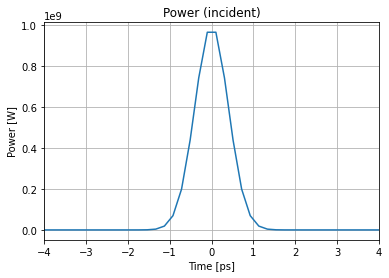

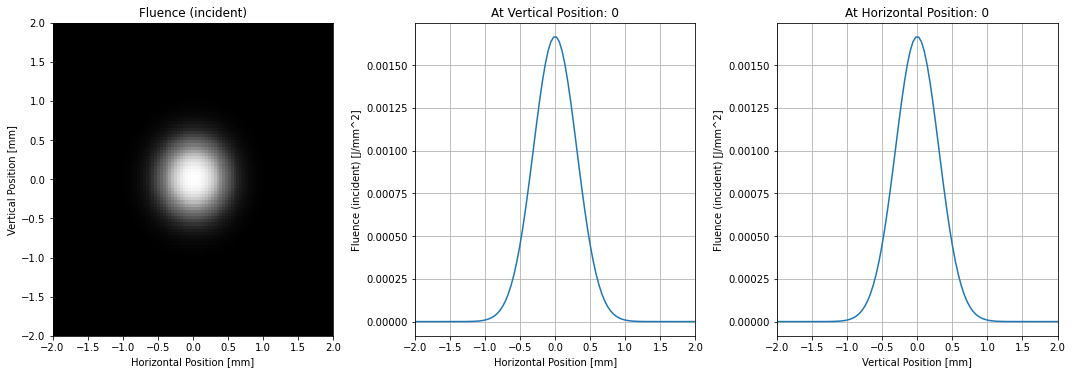

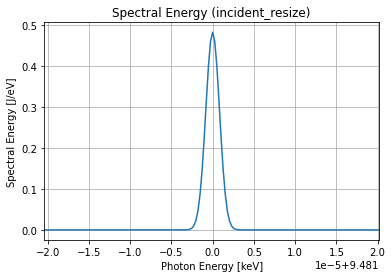

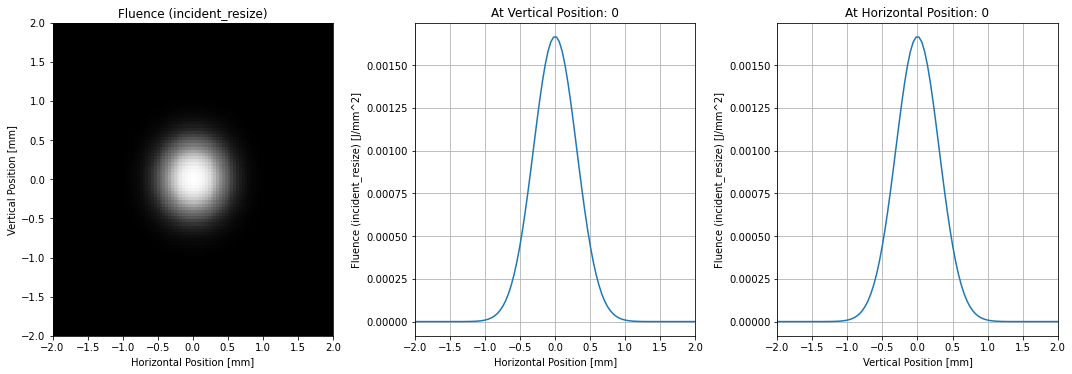

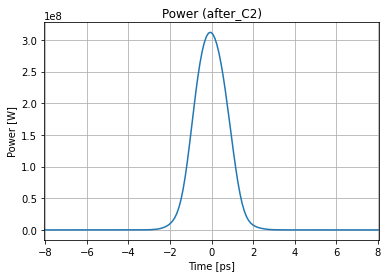

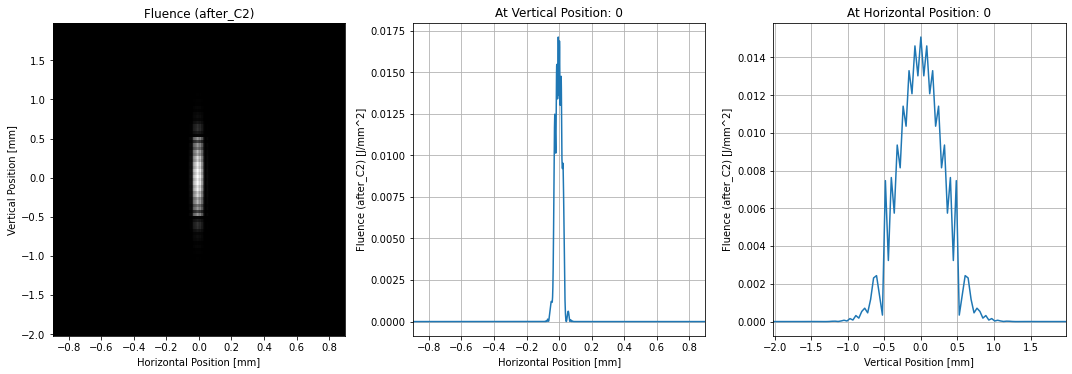

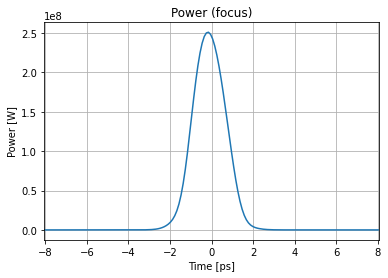

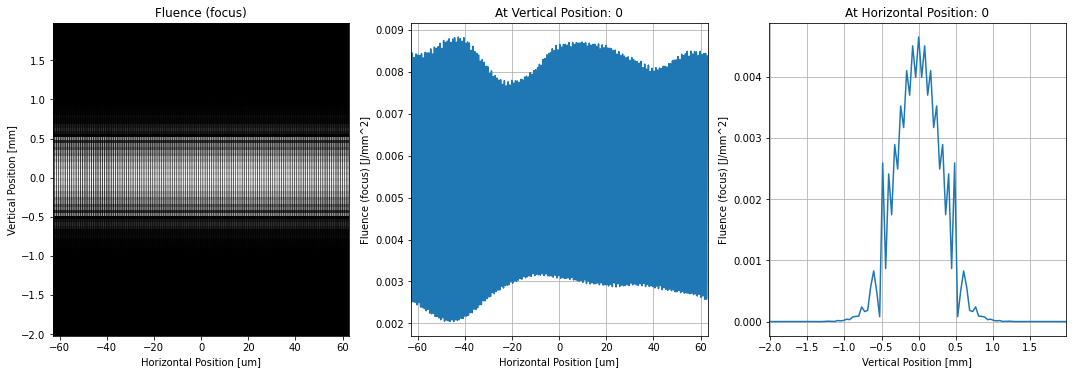

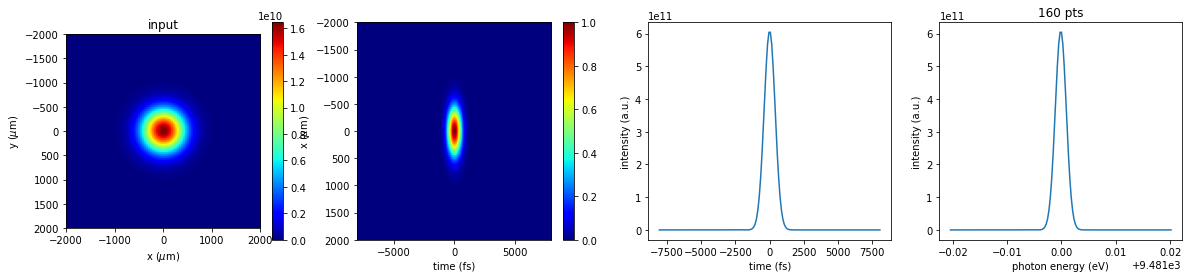

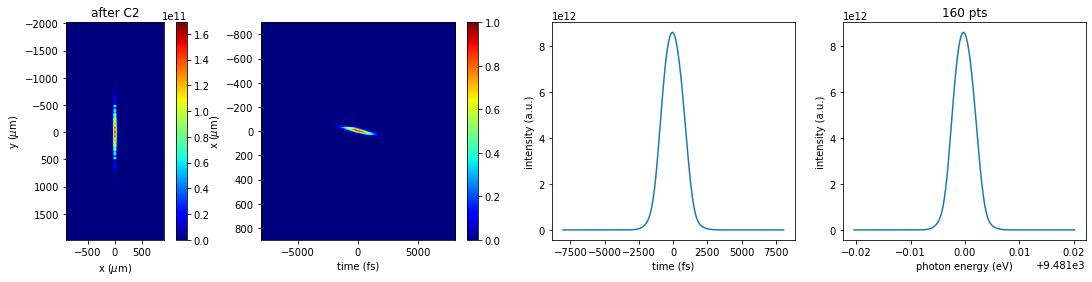

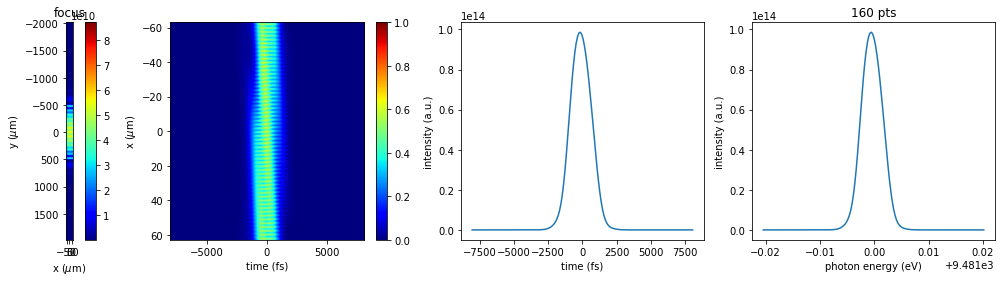

In [7]:
if __name__ == '__main__':
    # wfr0, wfr0_r, wfr1, wfr2, wfr3, wfr = main(_do_integ=True, _do_cuts=False)
    wfr0, wfr1, wfr2 = main(_do_integ=True, _do_cuts=False)
    ### Plots
    if_short = 0
    # wfs = [wfr0, wfr0_r, wfr1, wfr2, wfr3, wfr]
    # labels = ['input', 'input resize', 'after C2', 'focus', 'before C3', 'output']
    wfs = [wfr0, wfr1, wfr2]
    labels = ['input', 'after C2', 'focus']

    for i in range(len(wfs)):
        plt.figure(figsize=(20,4))
        plt.subplot(1,4,1); plot_spatial_from_wf(wfs[i]); plt.title(labels[i])
        #plt.subplot(1,4,2); plot_tilt_from_wf(wfs[i],ori='Vertical',type='slice')
        plt.subplot(1,4,2); plot_tilt_from_wf(wfs[i],ori='Horizontal',type='slice')
        plt.subplot(1,4,3); plot_tprofile_from_wf(wfs[i], if_short=if_short)
        plt.subplot(1,4,4); plot_spectrum_from_wf(wfs[i], if_short=if_short); plt.title('{} pts'.format(len(get_axis_ev(wfs[i]))))

        plt.savefig('nz{}_{}.png'.format(nz, labels[i]))



In [8]:
## Questions:
# 1. calculating throughput.
# 2. Is OMP_NUM_THREADS=2 python ** enough for what I want? How do I test for shared memory access on PSANA?
# check along beamline to see if result makes sense: spectral resolution at focus (plot photon energy vs x)
# ask Hugo how to speed the code up using openMP; need 100 x 100 x 100
# parameter scan: f1
# or load a genesis output

In [9]:
print(tRange, tRes, fRange, fRes)

2 2 1 1
